# Rewrite to Other Kinds of Frameworks

<br />

I will rewrite codes of TensorFlow that I created on the sprint 14 that handle 4 kinds of datasets to the other kind of frameworks, Keras.

## [Task 5] Fit MNIST by Keras

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras import layers
import matplotlib.pylab as plt
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
# Download the MNIST dataset

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# Flatten

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

In [5]:
# Transform unit8 to float

X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255

In [6]:
# One hot encoder

# Initialize
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Fit
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])

# Transform
y_test_one_hot = enc.transform(y_test[:, np.newaxis])

In [7]:
# Split the dataframe into train and test datasets

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2, random_state=0)

In [8]:
# Set hyperparameters

LEARNING_RATE = 0.01
BATCH_SIZE = 10
NUM_EPOCHS = 10

In [9]:
N_HIDDEN1 = 50
N_HIDDEN2 = 100
N_CLASSES = 10

In [14]:
# Initialize
model = tf.keras.Sequential()

# 1st layer
model.add(tf.keras.layers.Dense(N_HIDDEN1, activation=tf.nn.relu, input_shape=(784,)))

# 2nd layer
model.add(tf.keras.layers.Dense(N_HIDDEN2, activation=tf.nn.relu))

# 3rd layer
model.add(tf.keras.layers.Dense(N_CLASSES, activation=tf.nn.softmax))

In [15]:
# Check

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 45,360
Trainable params: 45,360
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compile

model.compile(loss='categorical_crossentropy',
              optimizer=tf.train.AdamOptimizer(learning_rate=LEARNING_RATE),
              metrics=['accuracy'])

In [17]:
# Fit

history = model.fit(X_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    verbose=1,
                    validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
48000/48000 [==============================] - 9s 179us/sample - loss: 0.3918 - acc: 0.8949 - val_loss: 0.2948 - val_acc: 0.9259
Epoch 2/10
48000/48000 [==============================] - 8s 174us/sample - loss: 0.2826 - acc: 0.9294 - val_loss: 0.2697 - val_acc: 0.9306
Epoch 3/10
48000/48000 [==============================] - 12s 250us/sample - loss: 0.2628 - acc: 0.9382 - val_loss: 0.2778 - val_acc: 0.9395
Epoch 4/10
48000/48000 [==============================] - 8s 177us/sample - loss: 0.2452 - acc: 0.9432 - val_loss: 0.2791 - val_acc: 0.9394
Epoch 5/10
48000/48000 [==============================] - 9s 183us/sample - loss: 0.2434 - acc: 0.9445 - val_loss: 0.2411 - val_acc: 0.9483
Epoch 6/10
48000/48000 [==============================] - 9s 192us/sample - loss: 0.2269 - acc: 0.9485 - val_loss: 0.2734 - val_acc: 0.9384
Epoch 7/10
48000/48000 [==============================] - 9s 

In [18]:
# Predict

y_pred_proba = model.predict(X_test)[:,0]

# Change probabilities to 0/1
y_pred = np.where(y_pred_proba>0.5, 1, 0)

print("y_pred_proba", y_pred_proba)
print("y_pred", y_pred)

y_pred_proba [3.6926363e-15 8.1195322e-21 0.0000000e+00 ... 1.6796985e-14 0.0000000e+00
 2.5447870e-24]
y_pred [0 0 0 ... 0 0 0]


In [20]:
# Evaluate

score = model.evaluate(X_test, y_test_one_hot, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2656328074228019
Test accuracy: 0.9491


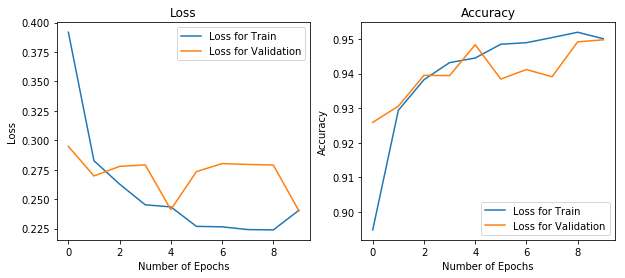

In [21]:
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))

# loss
def plot_history_loss(fit):
    # Plot the loss in the history
    axL.plot(fit.history['loss'],label="Loss for Train")
    axL.plot(fit.history['val_loss'],label="Loss for Validation")
    axL.set_title('Loss')
    axL.set_xlabel('Number of Epochs')
    axL.set_ylabel('Loss')
    axL.legend(loc='upper right')

# acc
def plot_history_acc(fit):
    # Plot the loss in the history
    axR.plot(fit.history['acc'],label="Loss for Train")
    axR.plot(fit.history['val_acc'],label="Loss for Validation")
    axR.set_title('Accuracy')
    axR.set_xlabel('Number of Epochs')
    axR.set_ylabel('Accuracy')
    axR.legend(loc='lower right')

plot_history_loss(history)
plot_history_acc(history)